### Import the necessary libraries

In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from loader_util.preprocessing import SimplePreProcessor, ImageToArrayPreprocessor
from loader_util.datasets import SimpleDatasetLoader
from loader_util.nn.conv import ShallowNet
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from imutils import paths
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

### Set the appropriate directory and paths to the Animal image dataset

In [2]:
# construct path to ImageFolder
pyth_dir = r"C:\Users\mhasa\Google Drive\Tutorial Corner\PYTH"
image_folder = os.path.join(pyth_dir,
                            'DeepLearning',
                            'DeepLearning-DL4CV',
                            'Edition3',
                            'SB_Code',
                            'datasets',
                            'animals')
args = {
    'dataset': image_folder
}
imagePaths = list(paths.list_images(args['dataset']))

### Below, data and image pre-processor objects are initialised and the data is loaded and fitted into the preprocessors

In [3]:
# initialise the preprocessors
sp = SimplePreProcessor(32,32)
iap = ImageToArrayPreprocessor()

# load the dataset
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
data, labels = sdl.load(imagePaths, verbose=500)
data = data.astype('float') / 255.0 # scale image to 0-1

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


### Split the data into training and testing sets

In [4]:
# partition the data
trainx, testx,  trainy, testy = train_test_split(data, 
                                                 labels, 
                                                 test_size=0.25, 
                                                 random_state=42)

trainy = LabelBinarizer().fit_transform(trainy)
testy = LabelBinarizer().fit_transform(testy)

### Initialise the optimizers and loss functions

In [5]:
opt = SGD(lr=0.005)
model = ShallowNet.build(32, 32, 3, 3)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])
H = model.fit(trainx, 
              trainy, 
              validation_data=[testx, testy],
              batch_size=32,
              epochs=100,
              verbose=1)

Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 11s 5ms/sample - loss: 1.0419 - accuracy: 0.4556 - val_loss: 0.9786 - val_accuracy: 0.5440

### Evaluate the performance of the trained model

In [8]:
# evaluate the network
preds = model.predict(testx, batch_size=32)
rep = classification_report(testy.argmax(axis=1), preds.argmax(axis=1), target_names=["cat", "dog", "panda"])
print(rep)

              precision    recall  f1-score   support

         cat       0.63      0.36      0.46       262
         dog       0.48      0.72      0.58       249
       panda       0.83      0.79      0.81       239

    accuracy                           0.62       750
   macro avg       0.65      0.62      0.61       750
weighted avg       0.64      0.62      0.61       750



In [9]:
epochs = range(1,101)
loss = H.history['loss']
accuracy = H.history['accuracy']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot the loss and accuracy trends

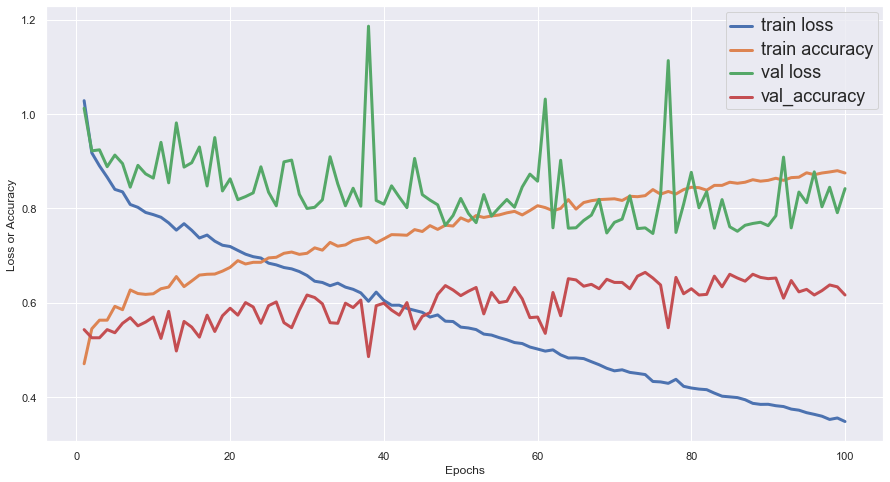

In [10]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text